In [5]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt

In [3]:
oil = pd.read_csv("./data/6_Oil_Production.csv")
oil.head()

,Year,Barrels
0,1880,30
1,1890,77
2,1900,149
3,1905,215
4,1910,328


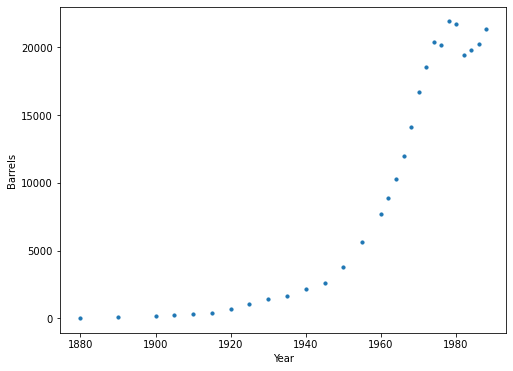

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(data=oil, x = "Year", y="Barrels", s=10)
plt.xlabel('Year')
plt.ylabel('Barrels')
plt.show()

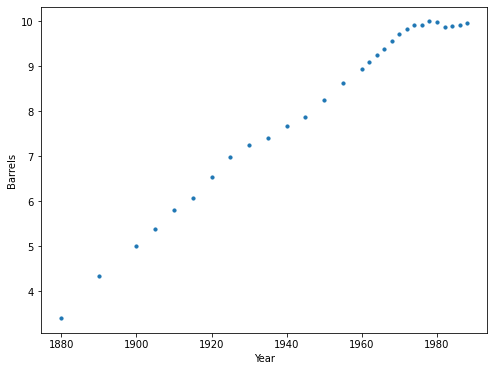

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(x = oil["Year"], y=np.log(oil["Barrels"]), s=10)
plt.xlabel('Year')
plt.ylabel('Barrels')
plt.show()

In [12]:
np.log(3)

1.0986122886681098

In [15]:
target = oil['Barrels']
x_data1 = oil['Year']
x_data1_1 = sm.add_constant(x_data1, has_constant="add")
model1 = sm.OLS(target, x_data1_1)
fitted_model1 = model1.fit()
fitted_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Barrels   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     107.8
Date:                Tue, 01 Jun 2021   Prob (F-statistic):           6.32e-11
Time:                        18:42:50   Log-Likelihood:                -280.30
No. Observations:                  29   AIC:                             564.6
Df Residuals:                      27   BIC:                             567.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.698e+05   4.62e+04    -10.176      0.000   -5.64e+05   -3.75e+05
Year         245.9129     23.688     10.381      0.000     197.309     294.517
==============================================================================
Omnibus:                        4.224   Durbin-Watson:                   0.107
Prob(Omnibus):                  0.121   Jarque-Bera (JB):                1.599
Skew:                           0.005   Prob(JB):                        0.450
Kurtosis:                       1.850   Cond. No.                     1.23e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
stor = pd.read_csv("./data/6_Storage.csv")
stor.head()

,Year,Price
0,1988,11.54
1,1989,9.30
2,1990,6.86
3,1991,5.23
4,1992,3.00


In [31]:
t = stor[['Year']] - 1987
stor['t'] = t

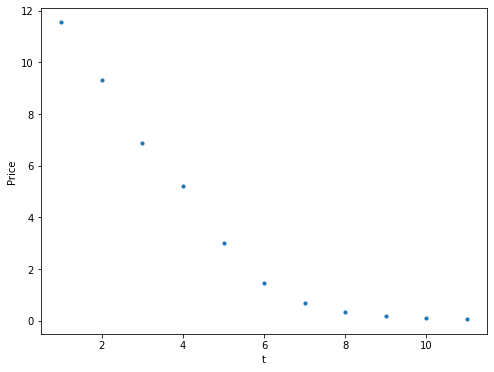

In [32]:
plt.figure(figsize=(8, 6))
plt.scatter(data=stor, x = "t", y="Price", s=10)
plt.xlabel('t')
plt.ylabel('Price')
plt.show()

In [33]:
target = np.log(stor['Price'])
x_data1 = stor['t']
x_data1_1 = sm.add_constant(x_data1, has_constant="add")
model1 = sm.OLS(target, x_data1_1)
fitted_model1 = model1.fit()
fitted_model1.summary()

C:\Users\KimYoungHo\AppData\Roaming\Python\Python38\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     421.0
Date:                Tue, 01 Jun 2021   Prob (F-statistic):           7.24e-09
Time:                        19:00:52   Log-Likelihood:               -0.75418
No. Observations:                  11   AIC:                             5.508
Df Residuals:                       9   BIC:                             6.304
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5069      0.185     18.929      0.000       3.088       3.926
t             -0.5605      0.027    -20.519      0.000      -0.622      -0.499
==============================================================================
Omnibus:                        0.009   Durbin-Watson:                   0.526
Prob(Omnibus):                  0.995   Jarque-Bera (JB):                0.200
Skew:                          -0.052   Prob(JB):                        0.905
Kurtosis:                       2.348   Cond. No.                         14.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
stor.loc[stor['Year']<=1991, 'z'] = 0
stor.loc[stor['Year']>1991, 'z'] = 1
stor['z'] = stor['z'].astype('int')
stor['t*z'] = stor['t']*stor['z']
stor.head()

,Year,Price,t,z,t*z
0,1988,11.54,1,0,0
1,1989,9.30,2,0,0
2,1990,6.86,3,0,0
3,1991,5.23,4,0,0
4,1992,3.00,5,1,5


In [44]:
target = np.log(stor['Price'])
x_data1 = stor[['t', 'z', 't*z']]
x_data1_1 = sm.add_constant(x_data1, has_constant="add")
model1 = sm.OLS(target, x_data1_1)
fitted_model1 = model1.fit()
fitted_model1.summary()

C:\Users\KimYoungHo\AppData\Roaming\Python\Python38\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     843.4
Date:                Tue, 01 Jun 2021   Prob (F-statistic):           2.57e-09
Time:                        19:05:47   Log-Likelihood:                 10.390
No. Observations:                  11   AIC:                            -12.78
Df Residuals:                       7   BIC:                            -11.19
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7336      0.144     18.924      0.000       2.392       3.075
t             -0.2679      0.053     -5.078      0.001      -0.393      -0.143
z              1.4769      0.234      6.318      0.000       0.924       2.030
t*z           -0.3776      0.057     -6.595      0.000      -0.513      -0.242
==============================================================================
Omnibus:                        1.407   Durbin-Watson:                   1.140
Prob(Omnibus):                  0.495   Jarque-Bera (JB):                0.487
Skew:                           0.514   Prob(JB):                        0.784
Kurtosis:                       2.919   Cond. No.                         69.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""